In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

workclass: 1836 records
occupation: 1843 records
country: 583 records


In [6]:
df[df == ' ?'] = np.nan

In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [8]:
for col in ['workclass', 'occupation', 'country' ]:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

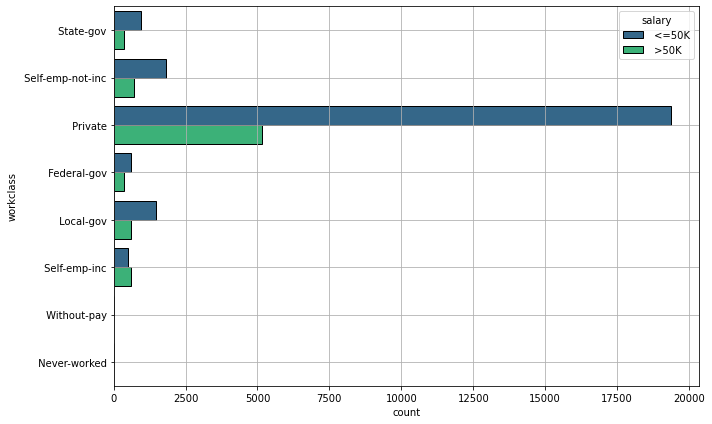

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

In [12]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [13]:
[df]

[       age          workclass  fnlwgt    education  education-num  \
 0       39          State-gov   77516    Bachelors             13   
 1       50   Self-emp-not-inc   83311    Bachelors             13   
 2       38            Private  215646      HS-grad              9   
 3       53            Private  234721         11th              7   
 4       28            Private  338409    Bachelors             13   
 ...    ...                ...     ...          ...            ...   
 32556   27            Private  257302   Assoc-acdm             12   
 32557   40            Private  154374      HS-grad              9   
 32558   58            Private  151910      HS-grad              9   
 32559   22            Private  201490      HS-grad              9   
 32560   52       Self-emp-inc  287927      HS-grad              9   
 
             marital-status          occupation    relationship    race  \
 0            Never-married        Adm-clerical   Not-in-family   White   
 1      

In [14]:
df['workclass'] = df['workclass'].apply(lambda x: 1 if 'Private' in x else 0)

In [15]:
df=df.drop(["education"],axis=1)

In [16]:
df=df.drop(["relationship"],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  country         32561 non-null  object
 12  salary          32561 non-null  object
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


In [18]:
df['race'] = df['race'].apply(lambda x: 1 if 'White' in x else 0)

In [19]:
df['country'] = df['country'].apply(lambda x: 1 if 'United-States' in x else 0)

In [20]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,Never-married,Adm-clerical,1,Male,2174,0,40,1,<=50K
1,50,0,83311,13,Married-civ-spouse,Exec-managerial,1,Male,0,0,13,1,<=50K
2,38,1,215646,9,Divorced,Handlers-cleaners,1,Male,0,0,40,1,<=50K
3,53,1,234721,7,Married-civ-spouse,Handlers-cleaners,0,Male,0,0,40,1,<=50K
4,28,1,338409,13,Married-civ-spouse,Prof-specialty,0,Female,0,0,40,0,<=50K


In [22]:
from sklearn.preprocessing import LabelEncoder
for col in df[df.columns]:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education-num   32561 non-null  int64
 4   marital-status  32561 non-null  int32
 5   occupation      32561 non-null  int32
 6   race            32561 non-null  int64
 7   sex             32561 non-null  int32
 8   capital-gain    32561 non-null  int64
 9   capital-loss    32561 non-null  int64
 10  hours-per-week  32561 non-null  int64
 11  country         32561 non-null  int64
 12  salary          32561 non-null  int32
dtypes: int32(4), int64(9)
memory usage: 2.7 MB


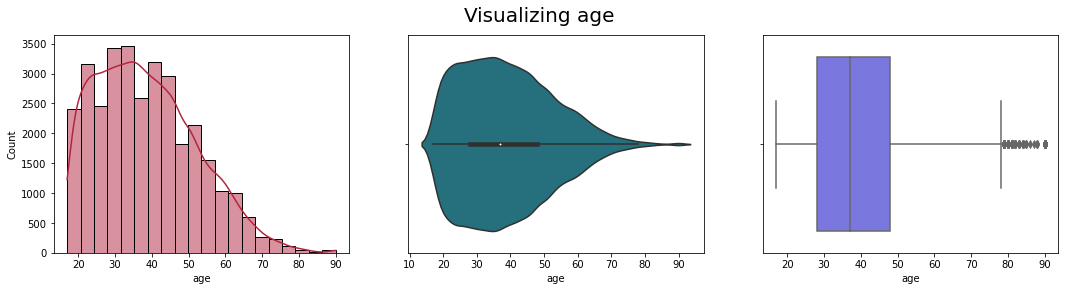

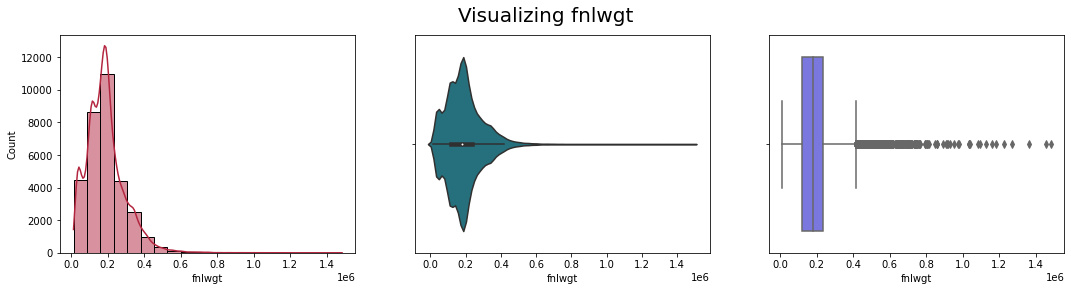

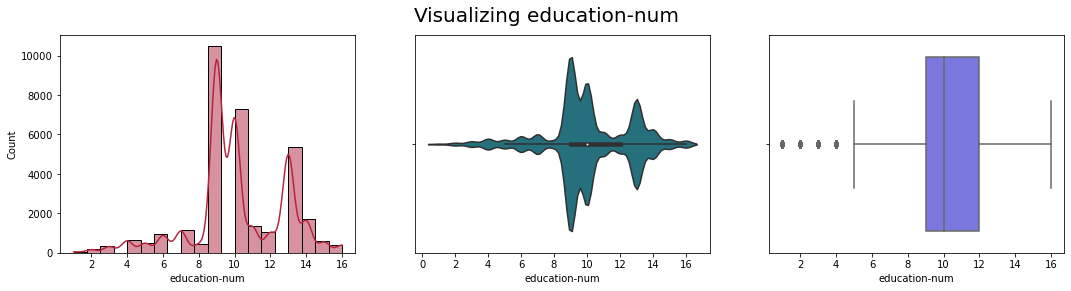

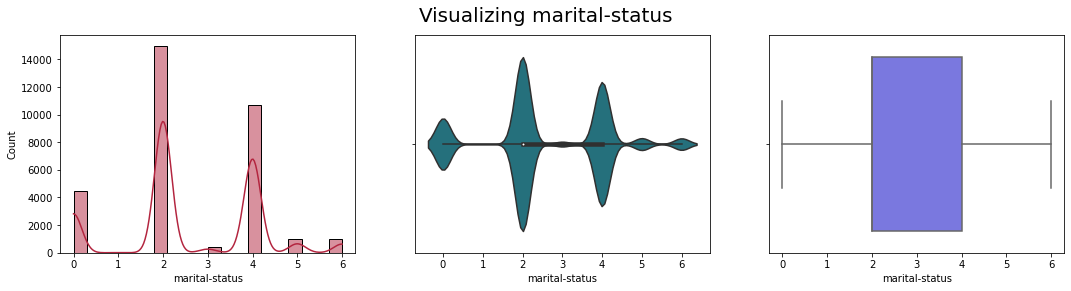

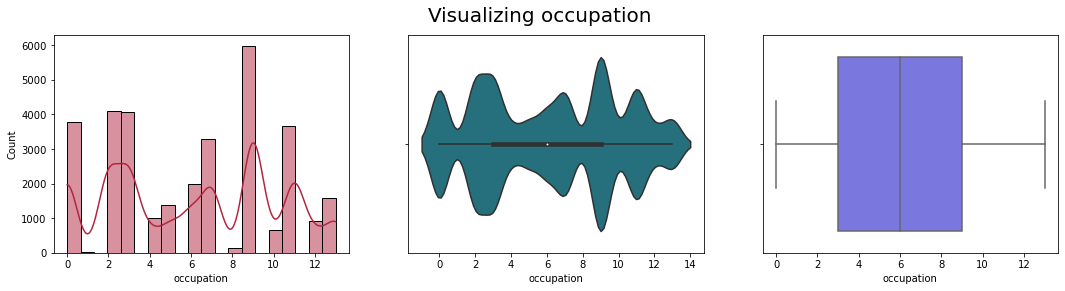

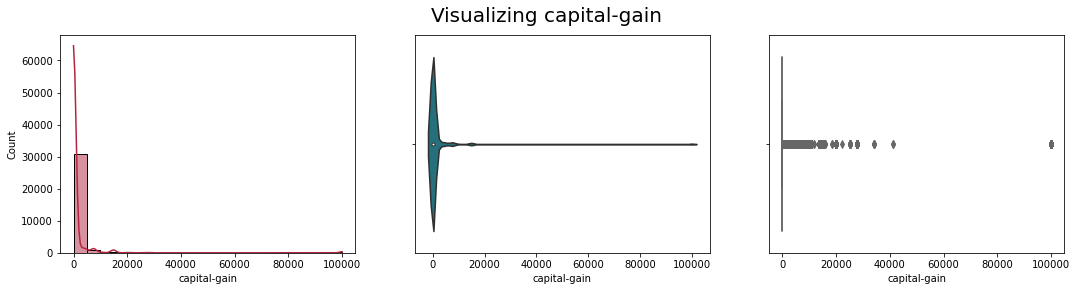

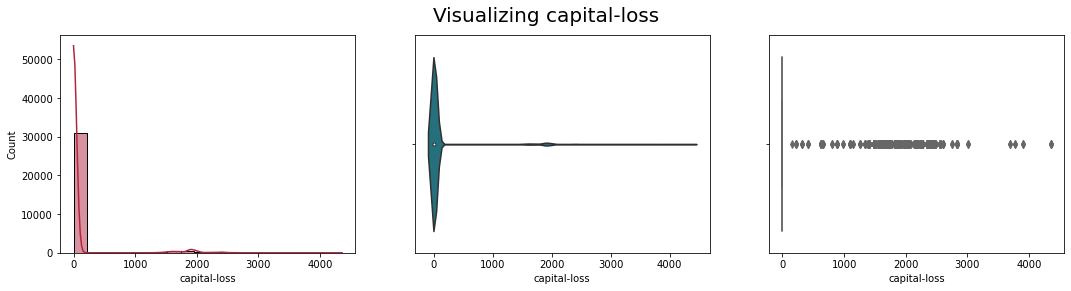

In [24]:
df1=df.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

In [25]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,0,1,1,2174,0,40,1,0
1,50,0,83311,13,2,3,1,1,0,0,13,1,0
2,38,1,215646,9,0,5,1,1,0,0,40,1,0
3,53,1,234721,7,2,5,0,1,0,0,40,1,0
4,28,1,338409,13,2,9,0,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,257302,12,2,12,1,0,0,0,38,1,0
32557,40,1,154374,9,2,6,1,1,0,0,40,1,1
32558,58,1,151910,9,6,0,1,0,0,0,40,1,0
32559,22,1,201490,9,4,0,1,1,0,0,20,1,0


In [27]:
!pip install lightgbm

In [28]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb 
import lightgbm as ltb

#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [43]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [29]:
X= df.drop(['salary'],axis=1)
y=df['salary']
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

In [46]:
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [47]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (18233, 12)(18233,)
Validation dataset: (4559, 12)(4559,)
Test dataset: (9769, 12)(9769,)


In [48]:
models = []
names = ['Random Forest','GaussianNB','DecisionTreeClassifier','Adaboost','Xgboost','LGBM']

models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((AdaBoostClassifier()))
models.append((xgb.XGBClassifier()))
models.append((ltb.LGBMClassifier()))

In [49]:
kfold = KFold(n_splits=5)
for i in range(0,len(models)):    
    cv_result = cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
Random Forest: 0.8552314103970169
----------------------------------------
GaussianNB: 0.8014915551656064
----------------------------------------
DecisionTreeClassifier: 0.8078525992542224
----------------------------------------
Adaboost: 0.8569861811800834
----------------------------------------
Xgboost: 0.8672954595305988


  File "C:\Users\Devaraj\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    return physical_cores_cache, exception


[LightGBM] [Info] Number of positive: 3499, number of negative: 11087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 580
[LightGBM] [Info] Number of data points in the train set: 14586, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239888 -> initscore=-1.153296
[LightGBM] [Info] Start training from score -1.153296
[LightGBM] [Info] Number of positive: 3472, number of negative: 11114
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 14586, number of used features: 12
[LightGBM] [Info] [bin

In [50]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8495240045040434
----------------------------------------
Confusion Matrix:
[[6839  519]
 [ 951 1460]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7358
           1       0.74      0.61      0.67      2411

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [ ]:

.